Stock data visualisation tool

In [1]:
# import libraries 

import yfinance as yf
import pandas as pd
import plotly.express as px
import random 
import plotly.io as pio

#pio.renderers.default = 'notebook_connected'

In [2]:
# get the dataset and prepare it function

def get_and_prep_dataset(list_of_tickers, call_num):

    # get ticker symbol from list of tickers from user
    set_ticker = list_of_tickers[call_num]

    # get ticker from Yahoo Finance API
    ticker = yf.Ticker(set_ticker)

    # get historical data - 5yr range 
    from_yahoo = ticker.history(period = '5y')

    # set raw_dataset variable 
    raw_dataset = from_yahoo

    # series holding closing prices
    df_ser = raw_dataset['Close']
    
    # series holding volume
    df_volume_ser = raw_dataset['Volume']

    # convert series to pandas dataframes 
    df = pd.DataFrame(df_ser)
    df.index.name = None # fix for the two rows for column header issue
    df.reset_index(level = 0, inplace = True)
    df.rename(columns = {'index' : 'Date'}, inplace = True)

    df_volume = pd.DataFrame(df_volume_ser)
    df_volume.index.name = None # fix for the two rows for column header issue
    df_volume.reset_index(level = 0, inplace = True)
    df_volume.rename(columns = {'index' : 'Date'}, inplace = True)

    # set name variable from dictionary of company info
    name = ticker.info['longName']

    # set ticker symbol variable from dictionary of company info
    ticker_symbol = ticker.info['symbol']

    return df, df_volume, name, ticker_symbol, ticker


In [3]:
# information function 

def get_company_info(ticker):

    # information for ETFs
    if ticker.info['quoteType'] == 'ETF':
        print(' ')
        print('Stock: '  + ticker.info['longName'])
        print(' ')
        print('//////////////////////////////////////////////////////////////////////////////////////////////////////////////')  
        print(' ')  
        print('Ticker Symbol: ' + ticker.info['symbol'])
        print('Type: Exchange Traded Fund (ETF)')
        print('Fund Family: ' + ticker.info['fundFamily'])
        print('Total Number of Assets: ' + str(ticker.info['totalAssets']))
        print(' ')
        print('Summary: ' + ticker.info['longBusinessSummary'])
        print(' ')
        print('//////////////////////////////////////////////////////////////////////////////////////////////////////////////')   
        print(' ')
        print('Holdings: ' + str(ticker.info['holdings']))
        print('\n')

    # information for equities 
    elif ticker.info['quoteType'] == 'EQUITY':  
        print(' ') 
        print('Stock: '  + ticker.info['longName'])
        print(' ')
        print('//////////////////////////////////////////////////////////////////////////////////////////////////////////////')  
        print(' ')
        print('Ticker Symbol: ' + ticker.info['symbol'])
        print('Industry: ' + ticker.info['industry'])
        print('Address: ' + ticker.info['address1'] + ', ' + ticker.info['city'] + ', ' + ticker.info['state'] + ', ' + ticker.info['country'])
        print(' ')
        print('Summary: ' + ticker.info['longBusinessSummary'])
        print(' ')
        print('//////////////////////////////////////////////////////////////////////////////////////////////////////////////')  
        print(' ')
        print('Profit Margin: ' + str(ticker.info['profitMargins']))
        print('Total Revenue: $' + str(ticker.info['totalRevenue']))
        print('Total Cash: $' + str(ticker.info['totalCash']))
        print('Total Debt: $' + str(ticker.info['totalDebt']))
        print('Debt to Equity: ' + str(ticker.info['debtToEquity']))
        print('Operating Cashflow: $' + str(ticker.info['operatingCashflow']))
        print('52 Week Change: ' + str(ticker.info['52WeekChange']))
        print('\n')
    

In [4]:
# visualisation function

def show_visual(df, df_volume, name, ticker_symbol):
    
    # holds all colors that will be used 
    all_colors = ['blue', 'orange', 'red', 'green', 'purple', 'brown', 'violet', 'pink', 'darkgoldenrod', 'black', 'teal']

    # visualise stock price at closing
    fig = px.line(df, x = 'Date', y = 'Close', title = '<b>' + name + ' (' + ticker_symbol + ')' + '</b>' + ' - Stock Price', labels = {'value' : 'Close Price'})

    fig.update_layout(height = 575)
    fig.update_traces(hovertemplate = 'Date: %{x} <br>Close Price: $%{y}', line_color = random.choice(all_colors))

    fig.show(renderer = 'svg')

    # visualise stock volume at closing
    fig_v = px.area(df_volume, x = 'Date', y = 'Volume', title = '<b>' + name + ' (' + ticker_symbol + ')' + '</b>' + ' - Stock Volume', labels = {'value' : 'Volume'})

    fig_v.update_layout(height = 575)
    fig_v.update_traces(hovertemplate = 'Date: %{x} <br>Volume: %{y}', line_color = random.choice(all_colors))

    fig_v.show(renderer = 'svg')


The tool will be run for 3 stock/s
The stock/s -> ['NET', 'GOOGL', 'VOO']


 
Stock: Cloudflare, Inc.
 
//////////////////////////////////////////////////////////////////////////////////////////////////////////////
 
Ticker Symbol: NET
Industry: Software—Infrastructure
Address: 101 Townsend Street, San Francisco, CA, United States
 
Summary: CloudFlare, Inc. operates a cloud platform that delivers a range of network services to businesses worldwide. The company provides an integrated cloud-based security solution to secure a range of combination of platforms, including public cloud, private cloud, on-premise, software-as-a-service applications, and Internet of Things (IoT) devices. Its security products comprise cloud firewall, bot management, distributed denial of service, IoT, SSL/TLS, secure origin connection, and rate limiting products. The company also offers performance solutions, which include content delivery, intelligent routing, and mobile software development kit, as well as

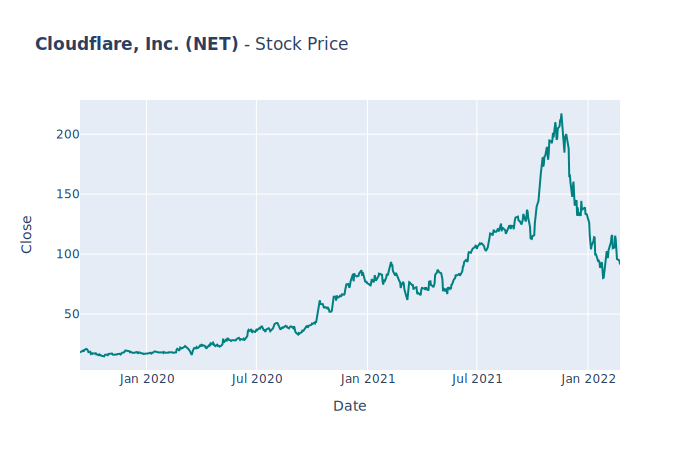

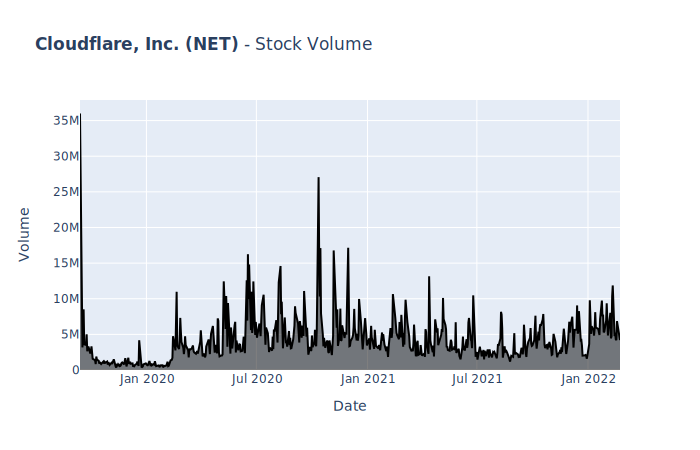

 
Stock: Alphabet Inc.
 
//////////////////////////////////////////////////////////////////////////////////////////////////////////////
 
Ticker Symbol: GOOGL
Industry: Internet Content & Information
Address: 1600 Amphitheatre Parkway, Mountain View, CA, United States
 
Summary: Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. The company offers performance and brand advertising services. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, such as ads, Android, Chrome, Google Maps, Google Play, Search, and YouTube; subscription-based products; and Fitbit wearable devices, Google Nest home products, Pixel phones, and other devices, as well as in-app purchases and digital content. The Google Cloud segment offers infrastructure, platform, and other services; Google Workspace that include cloud-based collab

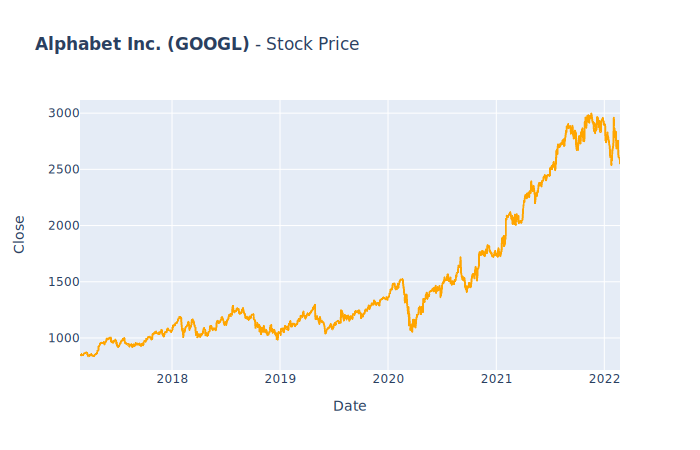

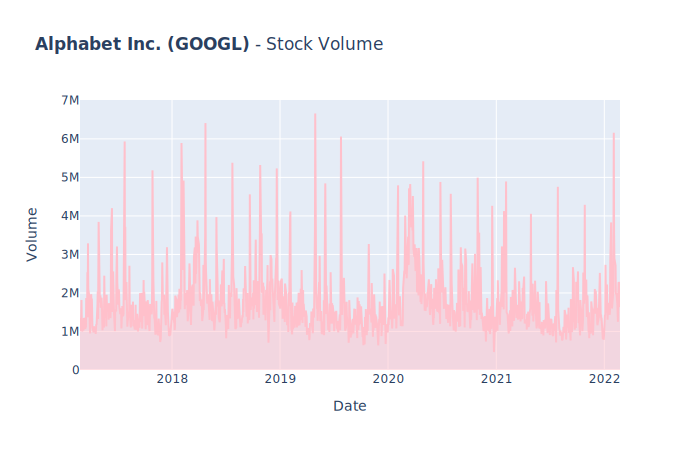

 
Stock: Vanguard S&P 500 ETF
 
//////////////////////////////////////////////////////////////////////////////////////////////////////////////
 
Ticker Symbol: VOO
Type: Exchange Traded Fund (ETF)
Fund Family: Vanguard
Total Number of Assets: 753409982464
 
Summary: The investment seeks to track the performance of the Standard & Poorâs 500 Index that measures the investment return of large-capitalization stocks.
 The fund employs an indexing investment approach designed to track the performance of the Standard & Poor&#39;s 500 Index, a widely recognized benchmark of U.S. stock market performance that is dominated by the stocks of large U.S. companies. The advisor attempts to replicate the target index by investing all, or substantially all, of its assets in the stocks that make up the index, holding each stock in approximately the same proportion as its weighting in the index.
 
//////////////////////////////////////////////////////////////////////////////////////////////////////////

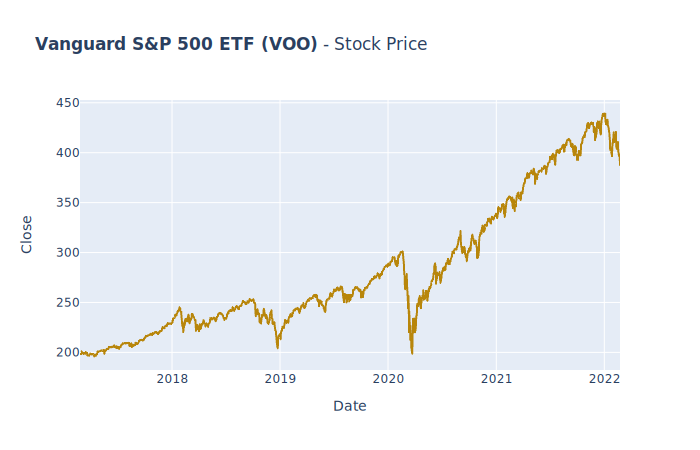

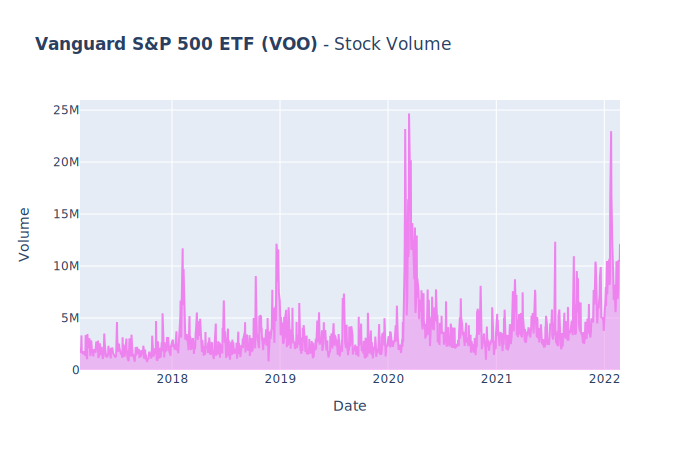

In [5]:
# all calls and input requests for the user

# user enters number of stocks to see 
how_many = input('Enter how many stocks: ')

# creates an array that will hold user input for ticker symbols 
list_of_tickers = []
for h in range(int(how_many)):
    input_ticker = input('Enter ticker symbol: ')
    list_of_tickers.append(input_ticker.upper())

# presentation info
print('The tool will be run for ' + str(how_many) + ' stock/s')
print('The stock/s -> ' + str(list_of_tickers))
print('\n')

# function calls 
for call_num in range(len(list_of_tickers)):
    df, df_volume, name, ticker_symbol, ticker = get_and_prep_dataset(list_of_tickers = list_of_tickers, call_num = call_num)
    get_company_info(ticker)
    show_visual(df, df_volume, name, ticker_symbol)
